In [2]:
# Standard data science imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistics packages
import pylab
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats

# Scikit-learn
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report


# Import chisquare from SciPy.stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
# Load data set into Pandas dataframe and read first two rows including header
df = pd.read_csv('churn_raw_data.csv')
df.head(2)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4


In [5]:
# Remove redundant "Unnamed" column at beginning & display first two records
df = df.drop(df.columns[0], axis = 1)
df.head(2)

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4


In [6]:
# Rename last 8 survey columns for better description of variables
df.rename(columns = {'item1':'Timely_Responses',
'item2':'Timely_Fixes',
'item3':'Timely_Replacements',
'item4':'Reliability',
'item5':'Options',
'item6':'Respectful_Response',
'item7':'Courteous_Exchange',
'item8':'Active_Listening'},
inplace=True)

<span style="color:Blue"><b> Data Cleaning </b></span>

In [7]:
#Check remaining columns in new dataset and remove unwanted columns if required
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'City', 'State', 'County',
       'Zip', 'Lat', 'Lng', 'Population', 'Area', 'Timezone', 'Job',
       'Children', 'Age', 'Education', 'Employment', 'Income', 'Marital',
       'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_Responses',
       'Timely_Fixes', 'Timely_Replacements', 'Reliability', 'Options',
       'Respectful_Response', 'Courteous_Exchange', 'Active_Listening'],
      dtype='object')

In [8]:
#we should also check count of missing values as well "NA" presence in dataset.
data_with_nulls = df.isnull().sum() 
data_with_na=df.isna().any()
print(data_with_nulls)
print(data_with_na)

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

In [9]:
# Identify duplicate rows in the dataframe and remove if required
duplicates_data_rows = df.loc[df.duplicated()]
print(duplicates_data_rows)

Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, Timely_Responses, Timely_Fixes, Timely_Replacements, Reliability, Options, Respectful_Response, Courteous_Exchange, Active_Listening]
Index: []

[0 rows x 51 columns]


In [10]:
# find out columns with invalid values or misspelling in case of catergorial data.
# This analysis will help later in analysis
print("Employment values \n",df['Employment'].unique())
print("Area values \n",df['Area'].unique())
print("Children values \n",df['Children'].unique())
print("Education values \n",df['Education'].unique())
print("Marital values \n",df['Marital'].unique())
print("Gender values \n",df['Gender'].unique())
print("Contract values \n",df['Contract'].unique())
print("PaymentMethod values \n",df['PaymentMethod'].unique())
print("age_range values \n",sorted(df['Age'].unique().astype(int)))

Employment values 
 ['Part Time' 'Retired' 'Student' 'Full Time' 'Unemployed']
Area values 
 ['Urban' 'Suburban' 'Rural']
Children values 
 [nan  1.  4.  0.  3.  2.  7.  5.  9.  6. 10.  8.]
Education values 
 ["Master's Degree" 'Regular High School Diploma' 'Doctorate Degree'
 'No Schooling Completed' "Associate's Degree" "Bachelor's Degree"
 'Some College, Less than 1 Year' 'GED or Alternative Credential'
 'Some College, 1 or More Years, No Degree'
 '9th Grade to 12th Grade, No Diploma' 'Nursery School to 8th Grade'
 'Professional School Degree']
Marital values 
 ['Widowed' 'Married' 'Separated' 'Never Married' 'Divorced']
Gender values 
 ['Male' 'Female' 'Prefer not to answer']
Contract values 
 ['One year' 'Month-to-month' 'Two Year']
PaymentMethod values 
 ['Credit Card (automatic)' 'Bank Transfer(automatic)' 'Mailed Check'
 'Electronic Check']
age_range values 
 [-2147483648, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44

In [11]:
# we found in above steps many missing data values for columns/features 
#Children, Age, Income, Tenure and Bandwidth_GB_Year
# Now its time to Impute missing fields  with median or mean
df['Children'] = df['Children'].fillna(df['Children'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df['Bandwidth_GB_Year'] = df['Bandwidth_GB_Year'].fillna(df['Bandwidth_GB_Year'].median())

In [12]:
#RE-check count of missing values after imputing missing fields 
data_with_nulls = df.isnull().sum() 
print(data_with_nulls)

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                   0
Age                        0
Education                  0
Employment                 0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

### <span style="color:Blue"><b> Dummy variable creation</b></span>

In [13]:
##Turn all yes/no into dummy variables  
# If the customer left (churned) they get a '1'
df['DummyGender'] = [1 if v == 'Male' else 0 for v in df['Gender']]
df['DummyChurn'] = [1 if v == 'Yes' else 0 for v in df['Churn']]
df['DummyTechie'] = [1 if v == 'Yes' else 0 for v in df['Techie']]
df['DummyContract'] = [1 if v == 'Two Year' else 0 for v in df['Contract']]
df['DummyPort_modem'] = [1 if v == 'Yes' else 0 for v in df['Port_modem']]
df['DummyTablet'] = [1 if v == 'Yes' else 0 for v in df['Tablet']]
df['DummyInternetService'] = [1 if v == 'Fiber Optic' else 0 for v in df['InternetService']]
df['DummyPhone'] = [1 if v == 'Yes' else 0 for v in df['Phone']]
df['DummyMultiple'] = [1 if v == 'Yes' else 0 for v in df['Multiple']]
df['DummyOnlineSecurity'] = [1 if v == 'Yes' else 0 for v in df['OnlineSecurity']]
df['DummyOnlineBackup'] = [1 if v == 'Yes' else 0 for v in df['OnlineBackup']]
df['DummyDeviceProtection'] = [1 if v == 'Yes' else 0 for v in df['DeviceProtection']]
df['DummyTechSupport'] = [1 if v == 'Yes' else 0 for v in df['TechSupport']]
df['DummyStreamingTV'] = [1 if v == 'Yes' else 0 for v in df['StreamingTV']]
df['StreamingMovies'] = [1 if v == 'Yes' else 0 for v in df['StreamingMovies']]
df['DummyPaperlessBilling'] = [1 if v == 'Yes' else 0 for v in df['PaperlessBilling']]

In [14]:
# Disregard unwanted variables and Move Churn to end of dataset as target
df_new = df[['Children', 'Age', 'Income',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_Responses',
       'Timely_Fixes', 'Timely_Replacements', 'Reliability', 'Options',
       'Respectful_Response', 'Courteous_Exchange', 'Active_Listening',
       'DummyGender','DummyTechie', 'DummyContract',
       'DummyPort_modem', 'DummyTablet', 'DummyInternetService', 'DummyPhone',
       'DummyMultiple', 'DummyOnlineSecurity', 'DummyOnlineBackup',
       'DummyDeviceProtection', 'DummyTechSupport', 'DummyStreamingTV',
       'DummyPaperlessBilling','DummyChurn']]

In [15]:
df_new.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,...,DummyInternetService,DummyPhone,DummyMultiple,DummyOnlineSecurity,DummyOnlineBackup,DummyDeviceProtection,DummyTechSupport,DummyStreamingTV,DummyPaperlessBilling,DummyChurn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.822500,53.207500,38256.017897,11.452955,12.016000,0.994200,0.398000,34.656864,174.076305,3397.166397,...,0.440800,0.812800,0.460800,0.357600,0.450600,0.438600,0.337400,0.492900,0.588200,0.265000
std,1.925971,18.003457,24747.872761,7.025921,3.025898,0.988466,0.635953,25.182812,43.335473,2072.718575,...,0.496508,0.390091,0.498486,0.479317,0.497579,0.496241,0.472846,0.499975,0.492184,0.441355
min,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,41.000000,23660.790000,8.054362,10.000000,0.000000,0.000000,8.700329,141.071078,1312.130487,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,53.000000,33186.785000,10.202896,12.000000,1.000000,0.000000,36.196030,169.915400,3382.424000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,65.000000,45504.192500,12.487644,14.000000,2.000000,1.000000,60.153487,203.777441,5466.284500,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### <span style="color:Blue"><b> Univariate Statistics </b></span>

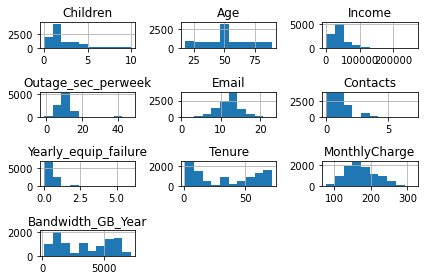

In [16]:
# Create histograms of contiuous variables
df_new[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 
          'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 
          'Bandwidth_GB_Year']].hist()
plt.savefig('churn_pyplot.jpg')
plt.tight_layout()

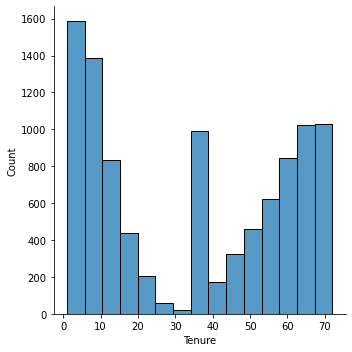

In [17]:
sns.displot(df['Tenure'])

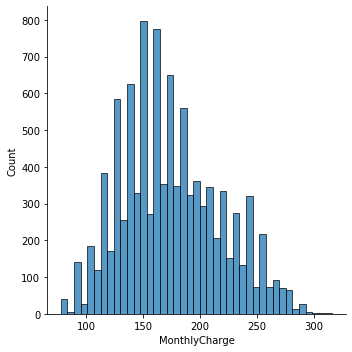

In [18]:
sns.displot(df['MonthlyCharge'])

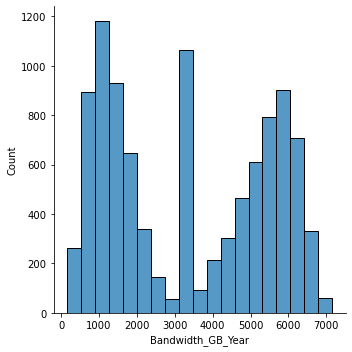

In [19]:
sns.displot(df['Bandwidth_GB_Year'])

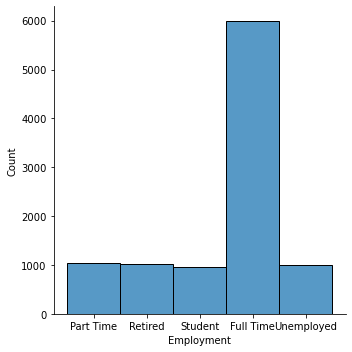

In [20]:
sns.displot(df['Employment'])

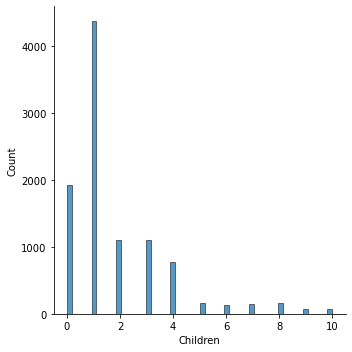

In [21]:
sns.displot(df['Children'])

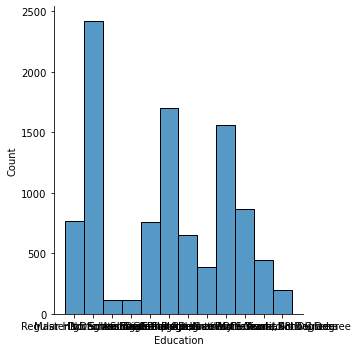

In [22]:
sns.displot(df['Education'])

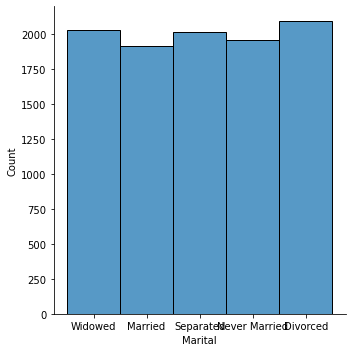

In [23]:
sns.displot(df['Marital'])

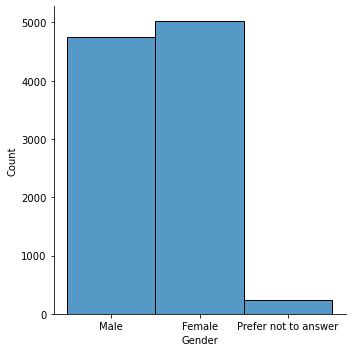

In [24]:
sns.displot(df['Gender'])

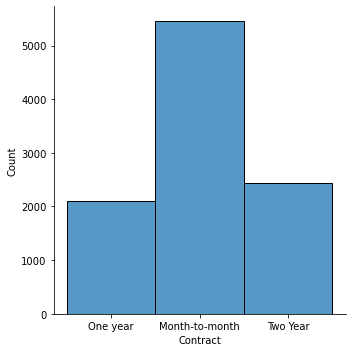

In [25]:
sns.displot(df['Contract'])

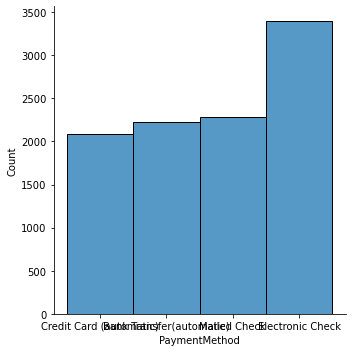

In [26]:
sns.displot(df['PaymentMethod'])

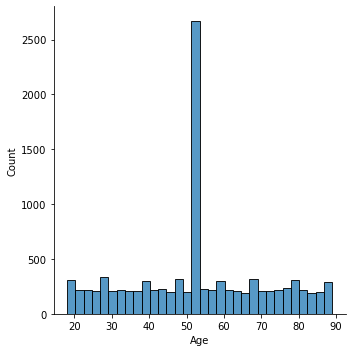

In [27]:
sns.displot(df['Age'])

### <span style="color:Blue"><b> Bivariate Statistics </b></span>
Let's run some scatterplots to get an idea of our linear relationships with <br>our target variable of "Churn" usage & some of the respective predictor variables.

<AxesSubplot:xlabel='Children', ylabel='DummyChurn'>

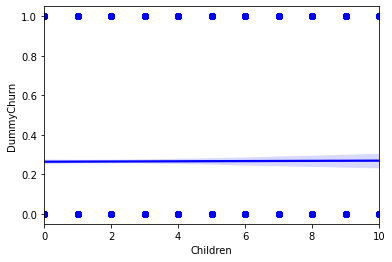

In [28]:
# Run regression plot  to show direct or inverse relationships 
# between target & independent variables
sns.regplot(df['Children'],df['DummyChurn'],color='blue') 

<AxesSubplot:xlabel='Age', ylabel='DummyChurn'>

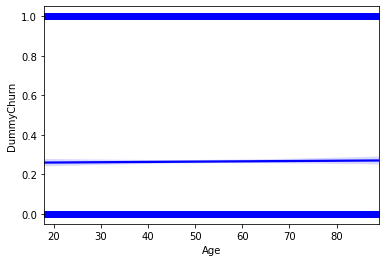

In [29]:
sns.regplot(df_new['Age'],df_new['DummyChurn'],color='blue')  

<AxesSubplot:xlabel='Income', ylabel='DummyChurn'>

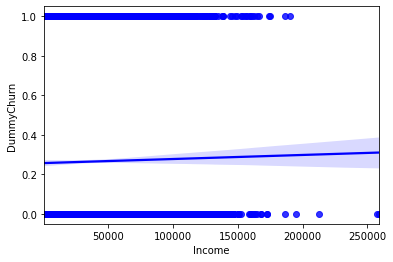

In [30]:
sns.regplot(df_new['Income'],df_new['DummyChurn'],color='blue')         

<AxesSubplot:xlabel='Outage_sec_perweek', ylabel='DummyChurn'>

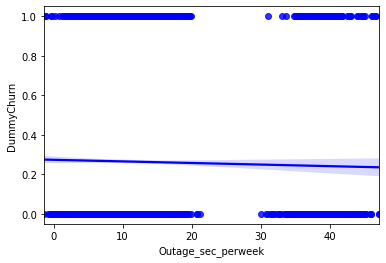

In [31]:
sns.regplot(df_new['Outage_sec_perweek'],df_new['DummyChurn'],color='blue') 

<AxesSubplot:xlabel='Email', ylabel='DummyChurn'>

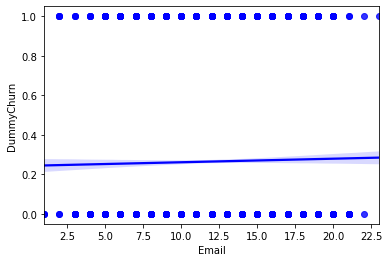

In [32]:
sns.regplot(df_new['Email'],df_new['DummyChurn'],color='blue') 

<AxesSubplot:xlabel='Contacts', ylabel='DummyChurn'>

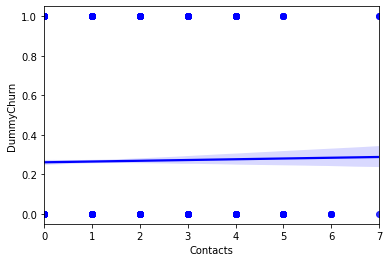

In [33]:
sns.regplot(df_new['Contacts'],df_new['DummyChurn'],color='blue')   

<AxesSubplot:xlabel='Yearly_equip_failure', ylabel='DummyChurn'>

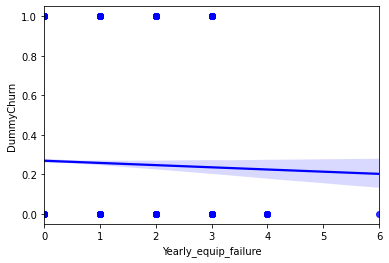

In [34]:
sns.regplot(df_new['Yearly_equip_failure'],df_new['DummyChurn'],color='blue') 

<AxesSubplot:xlabel='Tenure', ylabel='DummyChurn'>

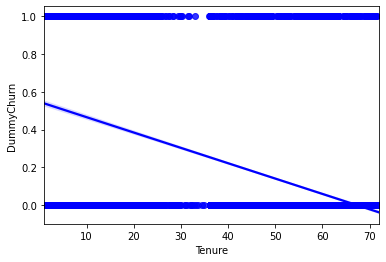

In [35]:
sns.regplot(df_new['Tenure'],df_new['DummyChurn'],color='blue') 

<AxesSubplot:xlabel='MonthlyCharge', ylabel='DummyChurn'>

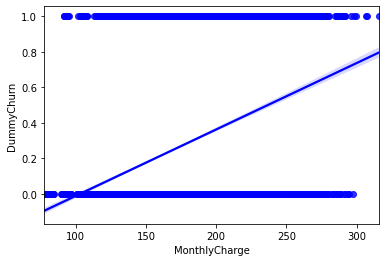

In [36]:
sns.regplot(df_new['MonthlyCharge'],df_new['DummyChurn'],color='blue') 

<AxesSubplot:xlabel='Timely_Responses', ylabel='DummyChurn'>

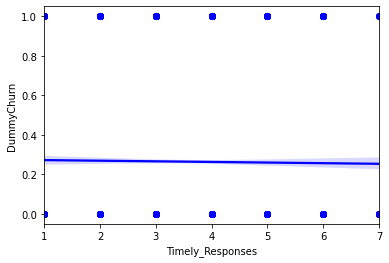

In [37]:
sns.regplot(df_new['Timely_Responses'],
            df_new['DummyChurn'],color='blue')

<AxesSubplot:xlabel='Timely_Fixes', ylabel='DummyChurn'>

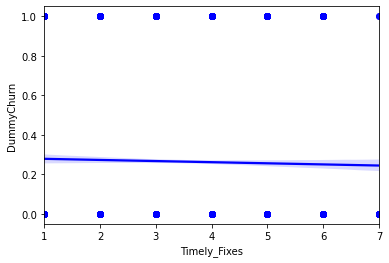

In [38]:
sns.regplot(df_new['Timely_Fixes'],
            df_new['DummyChurn'],color='blue') 

<AxesSubplot:xlabel='DummyTechie', ylabel='DummyChurn'>

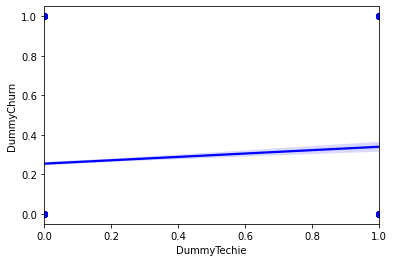

In [39]:
sns.regplot(df_new['DummyTechie'],
            df_new['DummyChurn'],color='blue') 

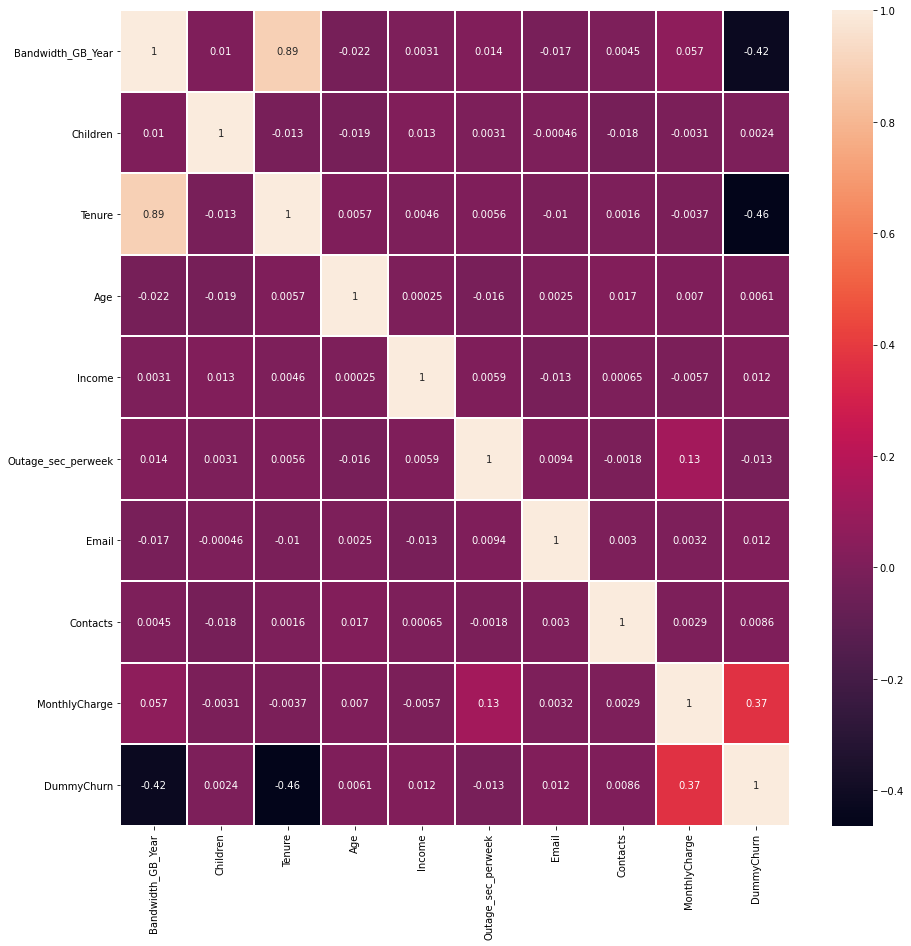

In [40]:
## find correlation of cited some of the respective predictor variables with "Churn"
plt.subplots(figsize=(15,15))
df_correlation = df[['Bandwidth_GB_Year','Children',
                     'Tenure','Age', 'Employment', 
                     'Income','Outage_sec_perweek',
                     'Email', 'Contacts', 'MonthlyCharge','DummyChurn']]
sns.heatmap(df_correlation.corr(),annot=True,lw=1);

### <span style="color:Blue"><b> Prepared Dataset Copy  </b></span>

In [41]:
# Extract Clean dataset
df_new.to_csv('churn_prepared_data_task2.csv')

In [42]:
df_prep=pd.read_csv('churn_prepared_data_task2.csv')
# Remove redundant "Unnamed" column at beginning & display first two records
df_prep = df_prep.drop(df_prep.columns[0], axis = 1)
df_prep.head(2)

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,...,DummyInternetService,DummyPhone,DummyMultiple,DummyOnlineSecurity,DummyOnlineBackup,DummyDeviceProtection,DummyTechSupport,DummyStreamingTV,DummyPaperlessBilling,DummyChurn
0,1.0,68.0,28561.99,6.972566,10,0,1,6.795513,171.449762,904.536110,...,1,1,0,1,1,0,0,0,1,0
1,1.0,27.0,21704.77,12.014541,12,0,1,1.156681,242.948015,800.982766,...,1,1,1,1,0,0,0,1,1,1


In [43]:
df_prep.columns

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Timely_Responses', 'Timely_Fixes', 'Timely_Replacements',
       'Reliability', 'Options', 'Respectful_Response', 'Courteous_Exchange',
       'Active_Listening', 'DummyGender', 'DummyTechie', 'DummyContract',
       'DummyPort_modem', 'DummyTablet', 'DummyInternetService', 'DummyPhone',
       'DummyMultiple', 'DummyOnlineSecurity', 'DummyOnlineBackup',
       'DummyDeviceProtection', 'DummyTechSupport', 'DummyStreamingTV',
       'DummyPaperlessBilling', 'DummyChurn'],
      dtype='object')

### <span style="color:Blue"><b> Initial Model  </b></span>

Significant advantage of the Logit model is it gives us the summary report of the model.<br>It gives us a comprehensive report on how the model is split, what are the main parameters to look at,<br> what are the different tests that is performed to validate if a feature is necessary or not for model creation.


In [44]:
# predict the probability of customer churn, given the only continuous variables
df['intercept'] = 1
df = pd.get_dummies(df, drop_first=True)

churn_logit_model = sm.Logit(df['DummyChurn'],df[['Children', 'Age','Income',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_Responses',
       'Timely_Fixes', 'Timely_Replacements', 'Reliability', 'Options',
       'Respectful_Response', 'Courteous_Exchange', 'Active_Listening',
       'DummyGender', 'DummyTechie', 'DummyContract',
       'DummyPort_modem', 'DummyTablet', 'DummyInternetService', 'DummyPhone',
       'DummyMultiple', 'DummyOnlineSecurity', 'DummyOnlineBackup',
       'DummyDeviceProtection', 'DummyTechSupport', 'DummyStreamingTV',
       'DummyPaperlessBilling','intercept']]).fit()
print(churn_logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.289265
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             DummyChurn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9967
Method:                           MLE   Df Model:                           32
Date:                Tue, 02 Nov 2021   Pseudo R-squ.:                  0.4997
Time:                        22:09:10   Log-Likelihood:                -2892.7
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Children                  0.0173      0.017      0.999      0.318      -0.017       0.

In the output, ‘Iterations 8‘ refer to the number of times the model iterates over the data, trying to optimize the model. By default, the maximum number of iterations performed is 35, after which the optimization fails.

In [45]:
# get odds ratio
np.exp(churn_logit_model.params)

Children                 1.017492
Age                      1.000284
Income                   1.000002
Outage_sec_perweek       0.960699
Email                    1.003153
Contacts                 1.042244
Yearly_equip_failure     0.961503
Tenure                   0.950600
MonthlyCharge            1.050578
Bandwidth_GB_Year        0.999492
Timely_Responses         0.979070
Timely_Fixes             1.024236
Timely_Replacements      0.969820
Reliability              0.985942
Options                  0.963437
Respectful_Response      0.973500
Courteous_Exchange       1.004524
Active_Listening         1.010840
DummyGender              1.286118
DummyTechie              2.243528
DummyContract            0.114375
DummyPort_modem          1.154049
DummyTablet              0.905483
DummyInternetService     0.144040
DummyPhone               0.843590
DummyMultiple            0.724016
DummyOnlineSecurity      0.814930
DummyOnlineBackup        0.640284
DummyDeviceProtection    0.749306
DummyTechSuppo

###  <span style="color:Blue"><b> Justification of Model Reduction</b></span>
Justify a statistically based variable selection procedure and a model <br>evaluation metric to reduce the initial model in a way that aligns with the research question.

In [46]:
# Create dataframe for heatmap bivariate analysis of correlation3
# Only considered variables with positive coefficient 
df_bivariate=df[['Outage_sec_perweek','Tenure','MonthlyCharge',
                 'Bandwidth_GB_Year','DummyGender','DummyTechie',
                 'DummyContract','DummyPort_modem','DummyInternetService',
                 'DummyPhone','DummyMultiple','DummyOnlineSecurity',
                 'DummyOnlineBackup','DummyDeviceProtection',
                 'DummyTechSupport']]

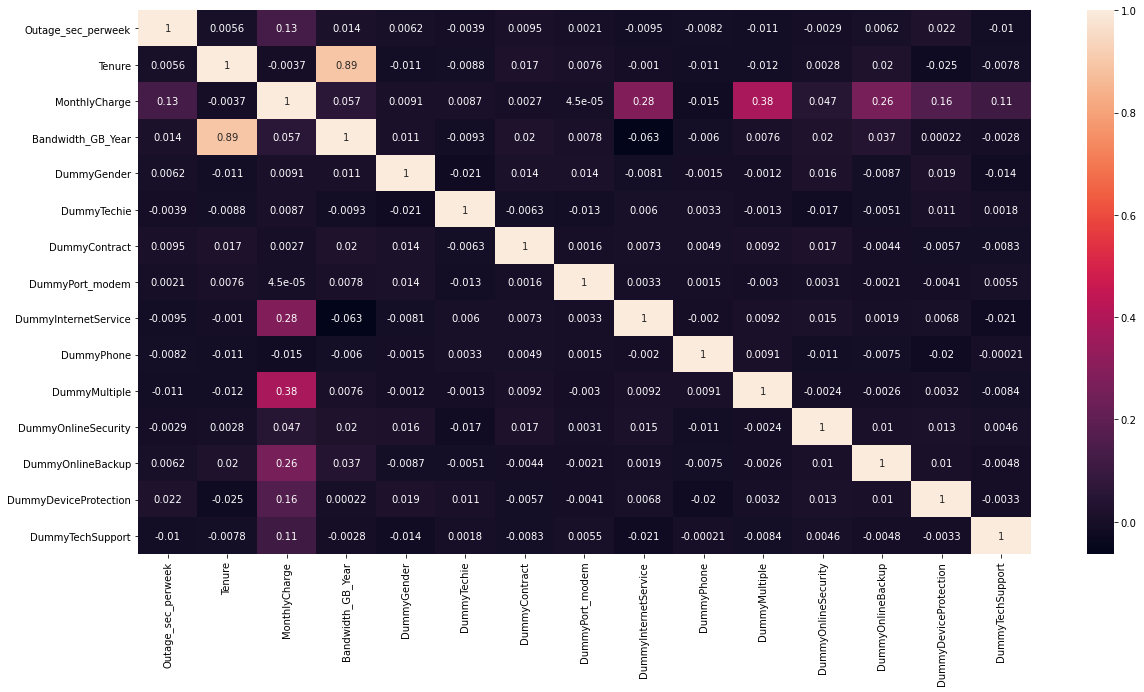

In [47]:
# Generate heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df_bivariate.corr(), annot=True)
plt.show()

###  <span style="color:Blue"><b> Reduced Logistic Regression Model</b></span>

In [48]:
# predict the probability of customer churn, given the only continuous variables
df['intercept'] = 1
churn_logit_model_reduced = sm.Logit(df['DummyChurn'], 
                                     df[['Outage_sec_perweek',
                                         'Tenure','MonthlyCharge','Bandwidth_GB_Year',
                                         'DummyGender','DummyTechie','DummyContract',
                                         'DummyPort_modem','DummyInternetService',
                                         'DummyPhone','DummyMultiple','DummyOnlineSecurity',
                                         'DummyOnlineBackup','DummyDeviceProtection',
                                         'DummyTechSupport','intercept']]).fit()
print(churn_logit_model_reduced.summary())

Optimization terminated successfully.
         Current function value: 0.289992
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             DummyChurn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Tue, 02 Nov 2021   Pseudo R-squ.:                  0.4985
Time:                        22:10:00   Log-Likelihood:                -2899.9
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Outage_sec_perweek       -0.0409      0.005     -8.440      0.000      -0.050      -0.

<b>After Removing all those other predictor variables also our model still explains 49% of the variance
</b>

###  <span style="color:Blue"><b> Confusion Matrix</b></span>
confusion matrix, also known as an error matrix. Its a specific table layout that allows visualization of the performance of an algorithm.<br>
Confusion matrix is a very popular measure used while solving classification problems.

In [48]:
# Import the prepared dataset
dataset = pd.read_csv('churn_prepared_data_task2.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [49]:
# Split the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [50]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [51]:
# Predict the Test set results
y_pred = classifier.predict(X_test)

In [52]:
# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1325  161]
 [ 209  305]]


In [53]:
## Compute the accuracy with k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.58 %
Standard Deviation: 0.93 %


<AxesSubplot:>

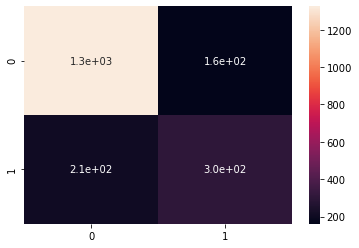

In [54]:
y_predict_test = classifier.predict(X_test)
cm2 = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm2, annot=True)

###  <span style="color:Blue"><b> Classification Report</b></span>

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1486
           1       0.65      0.59      0.62       514

    accuracy                           0.81      2000
   macro avg       0.76      0.74      0.75      2000
weighted avg       0.81      0.81      0.81      2000

